# Práctica Final - Deep Learning:

# *Texto a Imagen, utilizando Transformers y Auto-Encoders Variacionales*

Se instalan e importan las librerías necesarias.

In [ ]:
!pip install datasets huggingface_hub requests pillow transformers
!pip install -U "tensorflow-text==2.13.*"
!pip install "tf-models-official==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 92.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 10.8 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=1a8aacd25f90c1f9681dad07129b8709d6325ad5b6268d7c010765ea80126c18
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from datasets import load_dataset
from datasets import Dataset
import tensorflow as tf
from tensorflow.keras import layers, models
from transformers import TFDistilBertModel, DistilBertTokenizer
import numpy as np

In [ ]:
# Verificar que se está utilizando la GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

if tf.config.list_physical_devices('GPU'):
    print("TensorFlow está utilizando la GPU")
else:
    print("TensorFlow no está utilizando la GPU")

Num GPUs Available:  0
TensorFlow no está utilizando la GPU



### Paso 1: Se importa el dataset
El conjunto de datos utilizado contiene imágenes generadas con DALL-E y descripciones ascociadas

In [ ]:
dataset = load_dataset("MohamedRashad/midjourney-detailed-prompts")
dataset = dataset["train"]
print("Los atributos del dataset son", dataset.features)
print("El dataset contiene", dataset.num_rows, "registros")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/3053 [00:00<?, ? examples/s]

Los atributos del dataset son {'image': Image(mode=None, decode=True, id=None), 'image_description': Value(dtype='string', id=None), 'long_prompt': Value(dtype='string', id=None), 'short_prompt': Value(dtype='string', id=None)}
El dataset contiene 3053 registros


Map:   0%|          | 0/3053 [00:00<?, ? examples/s]

<ipython-input-5-8e8f33bedac4>:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return image.resize(size, Image.ANTIALIAS)




Prompt corto 0: 
A serene white wolf, its fur a rainbow kaleidoscope, poised in black emptiness.


Prompt corto 1: 
A colorful robot braves the storm, sheltering under a vibrant umbrella.


Prompt corto 2: 
A portrait: Serene young woman with vibrant pink dreadlocks, against a deep purple backdrop.


Prompt corto 3: 
An ethereal, masked figure stands tall, staff in hand, amidst mystical rocks and a rising moon.


Prompt corto 4: 
An epic, atmospheric landscape featuring a solitary traveler.


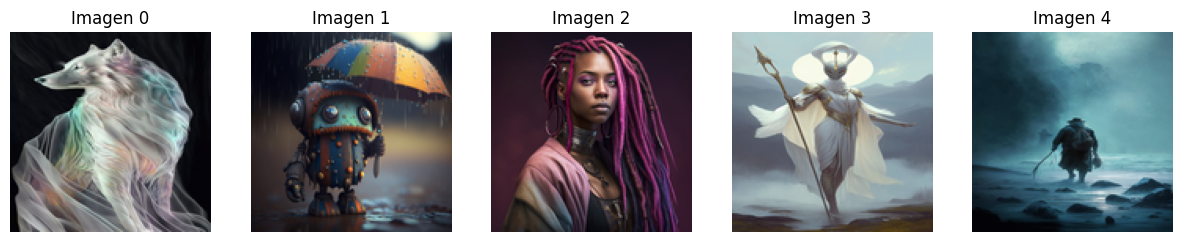

In [ ]:
def show_images(dataset, num_images=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        img = dataset[i]['image']
        if isinstance(img, str):
            img = Image.open(requests.get(img, stream=True).raw)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"Imagen {i}")
        plt.axis('off')
        print(f"\n\nPrompt corto {i}: ")
        print(dataset[i]['short_prompt'])
    plt.show()

# Función para redimensionar las imágenes
def resize_image(image, size=(128, 128)):
    """Redimensiona una imagen a las dimensiones especificadas."""
    return image.resize(size, Image.ANTIALIAS)

# Aplicar la función resize_image a todas las imágenes en el dataset
def process_data(example):
    img = example['image']
    if isinstance(img, str):
        img = Image.open(requests.get(img, stream=True).raw)
    return {"image": resize_image(img), "short_prompt": example['short_prompt']}

resized_dataset = dataset.map(process_data)

show_images(resized_dataset)

### Paso 2: Cargar un Modelo de Texto Preentrenado
Usamos un modelo de codificación de texto preentrenado como DistilBERT, que es una versión ligera de BERT (Bidirectional Encoder Representations from Transformers). El tokenizador correspondiente descompone el texto en tokens (fragmentos) comprensibles para el modelo. La elección de un modelo preentrenado nos permite reutilizar los patrones aprendidos durante su entrenamiento inicial, mejorando la calidad de la codificación textual sin la necesidad de un extenso entrenamiento desde cero.

In [ ]:
# Cargar el modelo preentrenado y el tokenizador
modelo_texto = "distilbert-base-uncased"
tokenizador = DistilBertTokenizer.from_pretrained(modelo_texto)
codificador_texto = TFDistilBertModel.from_pretrained(modelo_texto)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


### Paso 3: Definir los Componentes del VAE
Aquí, diseñamos el Autoencoder Variacional (VAE), una red generativa que puede aprender una distribución latente a partir de datos de entrada.

- **Codificador VAE**: Su objetivo es reducir la imagen de entrada a una representación latente compacta. Esto se logra mediante una serie de capas de convolución que comprimen la imagen. El codificador genera dos salidas: `mu` (media) y `log_var` (logaritmo de la varianza), que definen una distribución normal de la cual se muestrearán los vectores latentes.

- **Decodificador VAE**: Transforma los vectores latentes en imágenes reconstruidas. Este componente toma la representación comprimida y, a través de capas de convolución transpuesta, genera una imagen lo más parecida posible a la original.


In [ ]:
### Paso 3: Definir los Componentes del VAE
# Aquí, diseñamos el Autoencoder Variacional (VAE), una red generativa que puede aprender una distribución latente a partir de datos de entrada.

class VAEEncoder(tf.keras.Model):
    def __init__(self, latent_dim):
        super(VAEEncoder, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')
        self.conv2 = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')
        self.conv3 = layers.Conv2D(128, 3, activation='relu', strides=2, padding='same')
        self.flatten = layers.Flatten()
        self.dense = layers.Dense(256, activation='relu')
        self.fc_mu = layers.Dense(latent_dim)
        self.fc_log_var = layers.Dense(latent_dim)

    def call(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.flatten(x)
        x = self.dense(x)
        mu = self.fc_mu(x)
        log_var = self.fc_log_var(x)
        return mu, log_var

class VAEDecoder(tf.keras.Model):
    def __init__(self, latent_dim):
        super(VAEDecoder, self).__init__()
        self.fc = layers.Dense(8 * 8 * 256, activation='relu')
        self.reshape = layers.Reshape((8, 8, 256))
        self.conv1 = layers.Conv2DTranspose(128, 3, strides=2, padding='same', activation='relu')
        self.conv2 = layers.Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')
        self.conv3 = layers.Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu')
        self.conv4 = layers.Conv2DTranspose(3, 3, strides=2, padding='same', activation='sigmoid')

    def call(self, z):
        x = self.fc(z)
        x = self.reshape(x)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        return x

### Paso 4: Combinar Componentes en un Modelo
Este paso integra el codificador de texto con el VAE para crear un modelo completo.

- **Codificador de Texto**: Usa el modelo de transformador para convertir los textos en vectores de alta dimensión.
- **VAE Encoder y Decoder**: Estos módulos procesan la salida del codificador de texto, generando imágenes que corresponden al significado del texto.

La combinación entre transformadores para el texto y el VAE para las imágenes permite una generación más precisa de imágenes desde descripciones textuales, combinando patrones de lenguaje natural con capacidades generativas profundas.


In [ ]:
### Paso 4: Combinar Componentes en un Modelo
# Este paso integra el codificador de texto con el VAE para crear un modelo completo.

class ModeloTextoImagen(tf.keras.Model):
    def __init__(self, codificador_texto, vae_encoder, vae_decoder, dim_latente):
        super(ModeloTextoImagen, self).__init__()
        self.codificador_texto = codificador_texto
        self.vae_encoder = vae_encoder
        self.vae_decoder = vae_decoder
        self.fc_mu = layers.Dense(dim_latente)
        self.fc_log_var = layers.Dense(dim_latente)

    def call(self, entradas_texto):
        embedding_texto = self.codificador_texto(entradas_texto).last_hidden_state[:, 0, :]
        mu = self.fc_mu(embedding_texto)
        log_var = self.fc_log_var(embedding_texto)
        z = self.reparametrizar(mu, log_var)
        imagen_generada = self.vae_decoder(z)
        return imagen_generada

    def reparametrizar(self, mu, log_var):
        eps = tf.random.normal(shape=tf.shape(mu))
        return mu + tf.exp(log_var * 0.5) * eps


# Inicializar componentes
dim_latente = 256
vae_encoder = VAEEncoder(dim_latente)
vae_decoder = VAEDecoder(dim_latente)
modelo = ModeloTextoImagen(codificador_texto, vae_encoder, vae_decoder, dim_latente)

### Paso 5: Entrenar el Modelo
Para el entrenamiento, es fundamental contar con un conjunto de datos que incluya imágenes y sus correspondientes descripciones textuales.

- **Tokenización del Texto**: El tokenizador convierte cada descripción en una secuencia de tokens.
- **Entrenamiento**: Usamos las secuencias tokenizadas como entrada del modelo, junto con las imágenes preprocesadas. El modelo se entrena ajustando los pesos para minimizar la pérdida, logrando así una representación latente adecuada para generar imágenes.


In [ ]:
# Tokenizar el texto y preparar los tensores de entrada
textos_tokenizados = tokenizador(resized_dataset["short_prompt"], return_tensors='tf', padding=True, truncation=True)
imagenes = resized_dataset["image"]
del resized_dataset

In [ ]:
# Convertir las imágenes a arrays de NumPy y normalizar
imagenes_np = np.array([np.array(img) / 255.0 for img in imagenes])

# Compilar el modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.BinaryCrossentropy())

# Preparar el diccionario de entrada al modelo
input_ids = tf.constant(textos_tokenizados['input_ids'])
attention_mask = tf.constant(textos_tokenizados['attention_mask'])
data = {'input_ids': input_ids, 'attention_mask': attention_mask}

# Entrenar el modelo
history = modelo.fit(data, imagenes_np, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
77/77 [==============================] - 1115s 14s/step - loss: 0.6705 - val_loss: 0.6395
Epoch 2/10
77/77 [==============================] - 1053s 14s/step - loss: 0.6272 - val_loss: 0.6164
Epoch 3/10
77/77 [==============================] - 1046s 14s/step - loss: 0.6091 - val_loss: 0.6153
Epoch 4/10
77/77 [==============================] - 1044s 14s/step - loss: 0.5977 - val_loss: 0.6153
Epoch 5/10
77/77 [==============================] - 1048s 14s/step - loss: 0.5908 - val_loss: 0.6135
Epoch 6/10
77/77 [==============================] - 1063s 14s/step - loss: 0.5855 - val_loss: 0.6124
Epoch 7/10
77/77 [==============================] - 1032s 13s/step - loss: 0.5835 - val_loss: 0.6104
Epoch 8/10
77/77 [==============================] - 1053s 14s/step - loss: 0.5807 - val_loss: 0.6116
Epoch 9/10
77/77 [==============================] - 1058s 14s/step - loss: 0.5786 - val_loss: 0.6124
Epoch 10/10
77/77 [==============================] - 1049s 14s/step - loss: 0.5765 - val_lo

e

### Paso 6: Generar Imágenes a Partir de Texto
Una vez entrenado, el modelo puede generar imágenes a partir de nuevas descripciones textuales.

- **Entrada de Texto**: Al proporcionar un texto nuevo, se tokeniza y se pasa al modelo.
- **Generación de Imágenes**: El modelo genera una imagen basada en la codificación latente producida por la descripción textual, aprovechando la representación latente creada por el VAE y la semántica proporcionada por el codificador de texto.

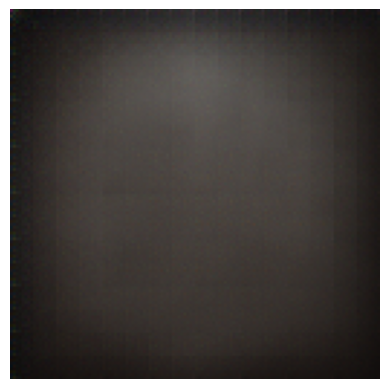

In [ ]:
### Paso 6: Generar Imágenes a Partir de Texto
# Una vez entrenado, el modelo puede generar imágenes a partir de nuevas descripciones textuales.

def generar_imagen_desde_texto(modelo, texto):
    textos_tokenizados = tokenizador(texto, return_tensors='tf', padding=True, truncation=True)
    imagen_generada = modelo(textos_tokenizados)
    return imagen_generada

def visualizar_imagen(tensor_imagen):
    if tensor_imagen.ndim == 4 and tensor_imagen.shape[0] == 1:
        imagen = tensor_imagen[0]
    else:
        imagen = tensor_imagen

    imagen_np = imagen.numpy()
    imagen_np = np.clip(imagen_np, 0, 1)

    plt.imshow(imagen_np)
    plt.axis('off')
    plt.show()

# Ejemplo de uso
nuevo_texto = "Sunset in the mountains"
imagen_generada = generar_imagen_desde_texto(modelo, nuevo_texto)
visualizar_imagen(imagen_generada)

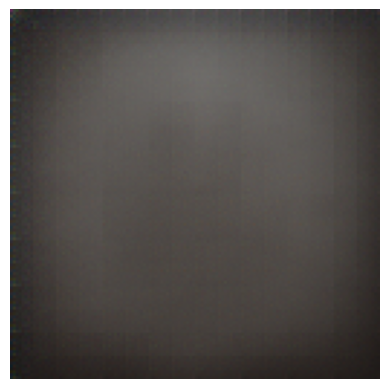

In [ ]:
# Ejemplo de uso
nuevo_texto = "A colorful robot braves the storm, sheltering under a vibrant umbrella."
imagen_generada = generar_imagen_desde_texto(modelo, nuevo_texto)
visualizar_imagen(imagen_generada)

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Guardar el modelo en Google Drive
ruta_modelo = '/content/drive/My Drive/modelo_texto_imagen'
modelo.save(ruta_modelo)
print(f'Modelo guardado en {ruta_modelo}')

Mounted at /content/drive


Modelo guardado en /content/drive/My Drive/modelo_texto_imagen


In [ ]:
modelo.save_weights('/content/drive/My Drive/modelo_texto_imagen_pesos.h5')

### Conclusión

Como se puede apreciar el resultado obtenido de imágenes no es el esperado ya que estas salen borrosas en la generación a partir de prompts especificos. A pesar de que las imagenes no queden nitidas se aprencian diferencias entre ambas con diferentes prompts, lo que siguiere que estan intentado generar las imagenes requeridas pero neceistan de mayor entrenamiento. Esto se debe a varios factores la primera seria la de la dimensión del espacio latente posiblemente demsiado baja, una arquitectura del VAE que podría ser mas compleja o un mayor número de épocas durante la fase de entrenamiento. El modelo tal cual se presenta tarbada mas de 4 horas en devolver resultados y debido a la complejidad computacional que hacer estos cambios no se ha podido obtener un resultado esperado mejor. Implementar dichas mejoras en estos aspectos puede aumentar significativamente la calidad de las imágenes generadas, resultando en representaciones más nítidas y detalladas. De esta practica hemos aprendido el funcionamiento de la arquitectura transformer y VAE y como es imprescindible disponer de hardware como GPUs mas pontentes capaces de llevar a cabo el entrenamiento de forma rapida y aumentado su precision.